# Project 1

    We begin by loading the data

In [71]:
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project
from lib.costs import *

# choose which implementations you would like
from lib.implementations import *
#from implementations import * #our implementations of the functions done by us


import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
DATA_FOLDER = 'data/'

y_train, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)

note that here we are only considering a sub_sample as the "True" value indicates

In [73]:
y_train_ori = y_train.copy()
tx_train_ori = tx_train.copy()
y_test_ori = y_test.copy()
tx_test_ori = y_test.copy()

In [74]:
# illegal: 
pd.DataFrame(tx_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


### Parameters

In [75]:
def clean_missing_values(tx):
    nan_values = (tx==-999)*1
    for col in range(tx.shape[1]):
        column = tx[:,col][tx[:,col]!=-999]
        median = np.median(column)
        tx[:,col][tx[:,col]==-999] = median
    return tx, nan_values

In [76]:


tx_train, nan_values_train = clean_missing_values(tx_train)
tx_test, nan_values_test = clean_missing_values(tx_test)



In [77]:
def standardize(x):
	"""Standardize the original data set."""
	mean_x = np.mean(x, axis=0)
	x = x - mean_x
	std_x = np.std(x, axis=0)
	for idx in range(len(std_x)):
		if std_x[idx] > 1e-15:
			x[idx] = x[idx] / std_x[idx]
	return x, mean_x, std_x

tx_train, tmp1, tmp2 = standardize(tx_train)
tx_test, tmp1, tmp2 = standardize(tx_test)

In [78]:
def add_ones(tx):
    return np.concatenate((np.ones([tx.shape[0],1]),tx), axis=1)
AAA = 0

In [79]:
if AAA == 0 :
    tx_train = add_ones(tx_train)
    tx_test = add_ones(tx_test)


In [80]:
tx_train.shape

(250000, 31)

In [81]:
initial_w = np.zeros(tx_train.shape[1])
initial_w

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [82]:
gamma = 0.05
max_iters = 1000
lambda_ = 0.5

# Methods

## *LEAST-SQUARES

In [88]:
def func_least_squares (y, tx, test_set, fct='mse'):
    name = 'least_squares'
    w,loss = least_squares(y,tx,fct)
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('least squares weights for loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

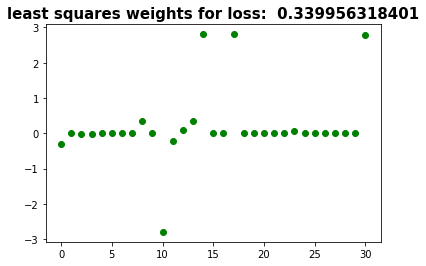

In [89]:
w, loss = func_least_squares (y=y_train, tx=tx_train, test_set=tx_test, fct='mse');


## *Gradient descent     -------------------------------------------------------------------------------

In [85]:
gamma = 0.05
max_iters = 50
lambda_ = 0.5

In [86]:
def func_GD (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Gradient_descent'
    w,loss = least_squares_GD(y, tx, initial_w, max_iters, gamma,fct='mae');
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('GD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

Gradient Descent(0/49): loss=0.3509957350189807, w0=-0.3146599953445604, w1=0.00023090123571808033
Gradient Descent(1/49): loss=0.35099573503705084, w0=-0.31465999534456074, w1=0.00023090128236106806
Gradient Descent(2/49): loss=0.3509956825716947, w0=-0.31465999534475697, w1=0.00023073979681919563
Gradient Descent(3/49): loss=0.3511514376970002, w0=-0.3146599947173441, w1=0.0006134148221816134
Gradient Descent(4/49): loss=2.19417273507195, w0=-0.31466195418750914, w1=-0.9662756169168735
Gradient Descent(5/49): loss=6512.066784003621, w0=-0.3085879143247222, w1=2643.712054137875
Gradient Descent(6/49): loss=19738856.118220784, w0=-19.072752831452068, w1=-7628072.628098691
Gradient Descent(7/49): loss=60310535249.78743, w0=57850.54761498166, w1=22699926460.0894
Gradient Descent(8/49): loss=184989744321957.7, w0=-178266029.031865, w1=-68683495450505.57
Gradient Descent(9/49): loss=5.684997542538759e+17, w0=549094275559.90564, w1=2.096160191675701e+17
Gradient Descent(10/49): loss=1.74873

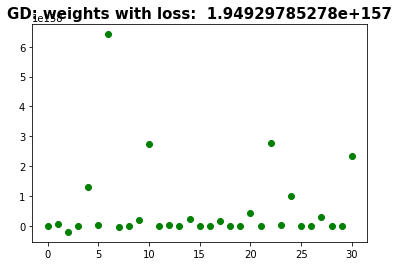

In [90]:
w, loss = func_GD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=max_iters,gamma=gamma, initial_w=initial_w);


In [246]:
w.shape
tx_train.shape

(250000, 31)

In [257]:
    y_pred_train = predict_labels(w, tx_train)
    right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
    right_train

72.547600000000003

## *Ridge regression    -------------------------------------------------------------------------------

In [146]:
def func_ridge_regression (y, tx, test_set, lambda_):
    name = 'Ridge_regression'
    
    w,loss = ridge_regression(y, tx, lambda_=lambda_, fct='mse');
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('Ridge regression: weights ;loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

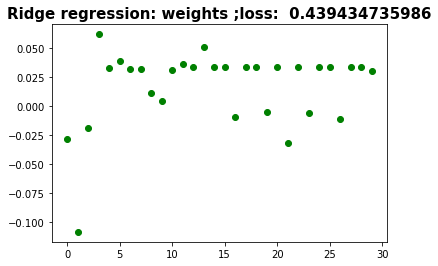

In [198]:
func_ridge_regression (y=y_train, tx=tx_train, test_set=tx_test, lambda_=lambda_);

## * SGD -------------------------------------------------------------------------------------------------

In [129]:
def func_SGD (y, tx, test_set, max_iters, gamma, initial_w, batch_size):
    name = 'Stochastic_Gradient_descent'
    
    w,loss = least_squares_SGD(y, tx, initial_w, max_iters,\
                               gamma, batch_size)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('SGD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

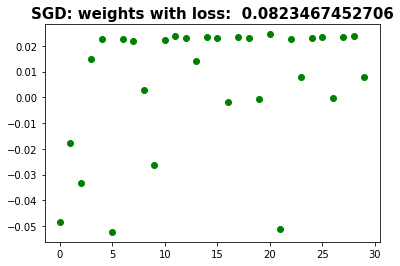

In [199]:
w, loss = func_SGD (y=y_train, tx=tx_train, test_set=tx_test, max_iters=10,gamma=gamma, initial_w=initial_w,\
                   batch_size=5);

## *LOGISTIC

In [289]:
def func_logistic (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression'
    
    w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    #w,loss = logistic_regression_mat (y, tx, initial_w, max_iters, gamma)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, name)
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

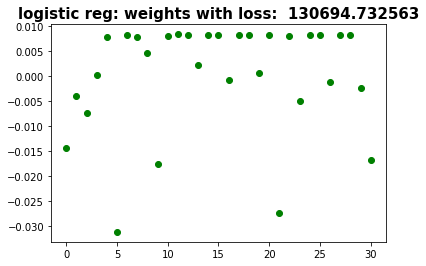

In [295]:
w, loss = func_logistic (y=y_train, tx=tx_train, test_set=tx_test, max_iters=10,\
                         gamma=0.000000001, initial_w=w);

In [293]:
y_pred_train = predict_labels(w, tx_train)
right_train = np.sum(y_pred_train == y_train)/len(y_train)*100
right_train

65.733199999999997